In [1]:
%matplotlib inline

# Finalizing Model Data

Code for finalizing the model data  
_Author: Jimmy Charité_  
_Email: jimmy.charite@gmail.com_  

# Directory & Packages

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import pysentiment
from textstat.textstat import textstat 
from wordcloud import WordCloud
import nltk
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
retval=os.chdir("..")

# Helper Functions

In [4]:
def pd_tab(df,col,sort_by='count',asc=False):
    tab=df[col].value_counts(dropna=False).reset_index(name='count')
    tab.columns=[col,'count']
    tab['percent']=tab['count']/tab['count'].sum()
    tab.sort_values(by=sort_by,inplace=True,ascending=asc)
    return tab

# Upload Data

In [5]:
raw_data=pd.read_pickle('./clean_data/raw_data_post_parse.pkl')
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,vec299,num_sents,num_words,readability,sentiment_dict,neg_senti,pos_senti,neu_senti,comp_senti,text_lemma
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,...,-0.002511,2,37,8.0,"{'compound': -0.1027, 'neu': 0.853, 'pos': 0.0...",0.079,0.068,0.853,-0.1027,product arrive label peanut actually small siz...
1,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,...,0.012566,4,35,1.3,"{'compound': 0.9468, 'neu': 0.552, 'pos': 0.44...",0.000,0.448,0.552,0.9468,great taffy great price wide assortment yummy ...
2,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,...,0.008930,5,90,8.6,"{'compound': 0.883, 'neu': 0.809, 'pos': 0.163...",0.029,0.163,0.809,0.8830,get wild hair taffy order pound bag taffy enjo...
3,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,...,0.016047,5,63,7.7,"{'compound': 0.9346, 'neu': 0.693, 'pos': 0.27...",0.034,0.273,0.693,0.9346,saltwater taffy great flavor soft chewy candy ...
4,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,...,0.004194,5,34,3.8,"{'compound': 0.9487, 'neu': 0.52, 'pos': 0.48,...",0.000,0.480,0.520,0.9487,taffy good soft chewy flavor amazing definitel...


### Finalizing Features

In [6]:
raw_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       ...
       'vec299', 'num_sents', 'num_words', 'readability', 'sentiment_dict',
       'neg_senti', 'pos_senti', 'neu_senti', 'comp_senti', 'text_lemma'],
      dtype='object', length=327)

In [7]:
fin_cols=['helpful','num_sents', 'num_words', 'readability',
          'neg_senti', 'pos_senti', 'neu_senti', 'comp_senti',
          'text_lemma']
vec_cols=[s for s in raw_data.columns if s[:3]=='vec']
fin_cols.extend(vec_cols)
fin_cols

['helpful',
 'num_sents',
 'num_words',
 'readability',
 'neg_senti',
 'pos_senti',
 'neu_senti',
 'comp_senti',
 'text_lemma',
 'vec0',
 'vec1',
 'vec2',
 'vec3',
 'vec4',
 'vec5',
 'vec6',
 'vec7',
 'vec8',
 'vec9',
 'vec10',
 'vec11',
 'vec12',
 'vec13',
 'vec14',
 'vec15',
 'vec16',
 'vec17',
 'vec18',
 'vec19',
 'vec20',
 'vec21',
 'vec22',
 'vec23',
 'vec24',
 'vec25',
 'vec26',
 'vec27',
 'vec28',
 'vec29',
 'vec30',
 'vec31',
 'vec32',
 'vec33',
 'vec34',
 'vec35',
 'vec36',
 'vec37',
 'vec38',
 'vec39',
 'vec40',
 'vec41',
 'vec42',
 'vec43',
 'vec44',
 'vec45',
 'vec46',
 'vec47',
 'vec48',
 'vec49',
 'vec50',
 'vec51',
 'vec52',
 'vec53',
 'vec54',
 'vec55',
 'vec56',
 'vec57',
 'vec58',
 'vec59',
 'vec60',
 'vec61',
 'vec62',
 'vec63',
 'vec64',
 'vec65',
 'vec66',
 'vec67',
 'vec68',
 'vec69',
 'vec70',
 'vec71',
 'vec72',
 'vec73',
 'vec74',
 'vec75',
 'vec76',
 'vec77',
 'vec78',
 'vec79',
 'vec80',
 'vec81',
 'vec82',
 'vec83',
 'vec84',
 'vec85',
 'vec86',
 'vec87',
 '

In [8]:
raw_data=raw_data[fin_cols].copy()

In [9]:
raw_data.head()

,helpful,num_sents,num_words,readability,neg_senti,pos_senti,neu_senti,comp_senti,text_lemma,vec0,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,0.0,2,37,8.0,0.079,0.068,0.853,-0.1027,product arrive label peanut actually small siz...,0.033346,...,-0.023125,-0.005069,0.007344,-0.045929,-0.017832,-0.018206,-0.017281,0.012410,0.020198,-0.002511
1,0.0,4,35,1.3,0.000,0.448,0.552,0.9468,great taffy great price wide assortment yummy ...,0.037825,...,-0.015524,0.009058,0.020853,-0.058746,-0.001076,-0.013715,-0.035464,0.006317,0.023066,0.012566
2,0.0,5,90,8.6,0.029,0.163,0.809,0.8830,get wild hair taffy order pound bag taffy enjo...,0.039023,...,-0.011637,0.008717,0.007918,-0.046595,-0.012542,-0.028316,-0.036677,0.015261,0.016227,0.008930
3,0.0,5,63,7.7,0.034,0.273,0.693,0.9346,saltwater taffy great flavor soft chewy candy ...,0.038912,...,-0.010440,0.006156,0.007695,-0.039642,-0.012080,-0.026868,-0.018743,0.009134,0.021543,0.016047
4,0.0,5,34,3.8,0.000,0.480,0.520,0.9487,taffy good soft chewy flavor amazing definitel...,0.043776,...,-0.010004,-0.003239,0.014308,-0.050601,-0.024100,-0.023046,-0.017151,0.017009,0.010729,0.004194


#### Number of Sentences

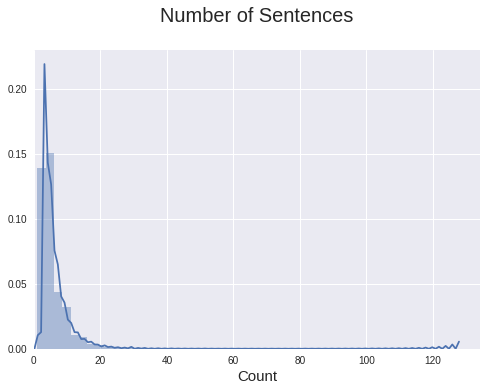

In [10]:
g=sns.distplot(raw_data.num_sents)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Sentences\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

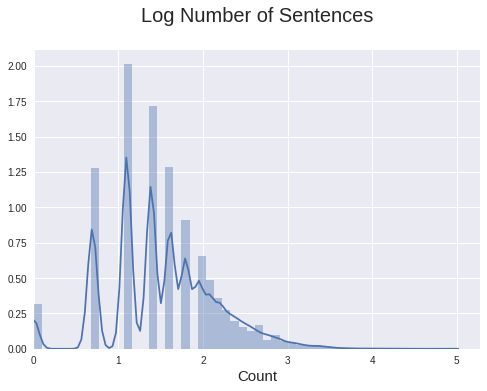

In [11]:
g=sns.distplot(np.log(raw_data.num_sents))
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Log Number of Sentences\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

Will use the log b/c of extreme skewness

In [12]:
raw_data['num_sents']=np.log(raw_data.num_sents)

#### Number of Words

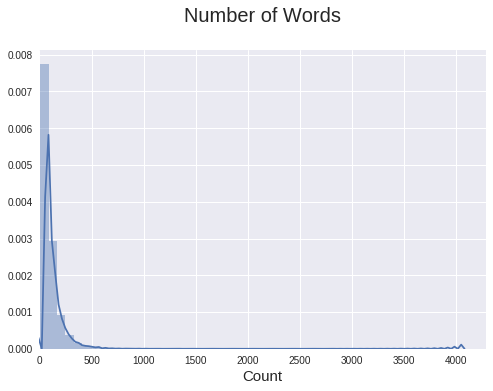

In [13]:
g=sns.distplot(raw_data.num_words)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

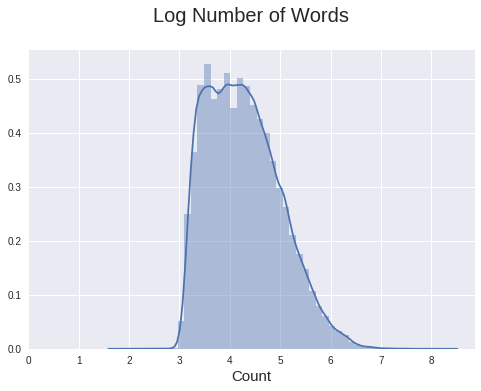

In [14]:
g=sns.distplot(np.log(raw_data.num_words))
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Log Number of Words\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

In [15]:
raw_data['num_words']=np.log(raw_data.num_words)

#### Readability

In [16]:
raw_data.readability.describe()

count    198659.000000
mean          6.398967
std           3.436570
min          -8.400000
25%           4.300000
50%           6.000000
75%           8.000000
max         345.600000
Name: readability, dtype: float64

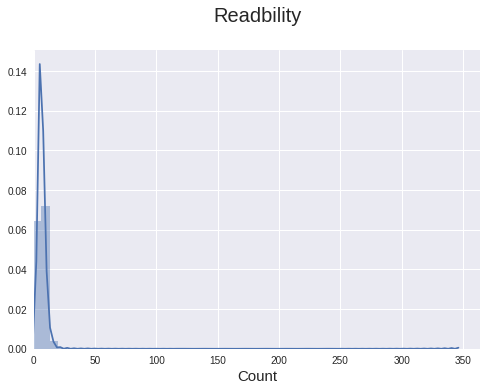

In [17]:
g=sns.distplot(raw_data.readability)
g.axes.set_ylim(0,)
g.axes.set_xlim(0,)
g.axes.set_title('Readbility\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

In [18]:
raw_data.readability.isnull().sum()

0

In retrospect, this seems less appropriate. However, I will just shift it to make it positive, then take the log

In [19]:
raw_data['readability']=np.log(raw_data.readability+100*np.abs(np.min(raw_data.readability)))

In [20]:
raw_data.readability.describe()

count    198659.000000
mean          6.740983
std           0.004010
min           6.723352
25%           6.738508
50%           6.740519
75%           6.742881
max           7.078004
Name: readability, dtype: float64

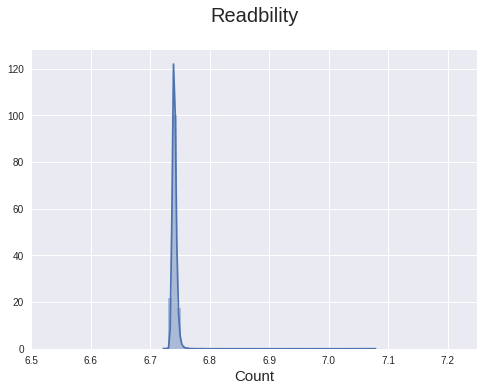

In [21]:
g=sns.distplot(raw_data.readability)
g.axes.set_ylim(0,)
g.axes.set_xlim(6.5,7.25)
g.axes.set_title('Readbility\n',fontsize=20)
g.set_xlabel('Count',fontsize=15)

This comically thin distribution will be adjusted with scaling

#### Sentiment

In [22]:
raw_data.neg_senti.describe()

count    198659.000000
mean          0.043195
std           0.052190
min           0.000000
25%           0.000000
50%           0.030000
75%           0.068000
max           0.602000
Name: neg_senti, dtype: float64

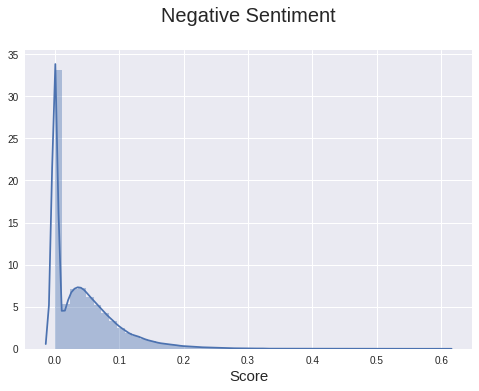

In [23]:
g=sns.distplot(raw_data.neg_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Negative Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [24]:
raw_data.pos_senti.describe()

count    198659.000000
mean          0.191822
std           0.106541
min           0.000000
25%           0.116000
50%           0.178000
75%           0.257000
max           0.964000
Name: pos_senti, dtype: float64

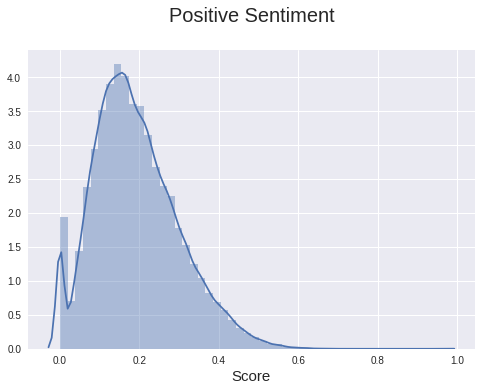

In [25]:
g=sns.distplot(raw_data.pos_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Positive Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [26]:
raw_data.neu_senti.describe()

count    198659.000000
mean          0.764983
std           0.100293
min           0.036000
25%           0.704000
50%           0.775000
75%           0.835000
max           1.000000
Name: neu_senti, dtype: float64

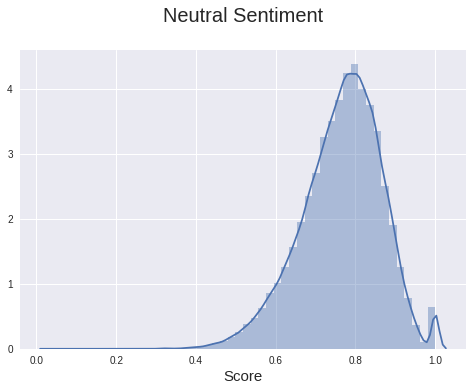

In [27]:
g=sns.distplot(raw_data.neu_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Neutral Sentiment\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

In [28]:
raw_data.comp_senti.describe()

count    198659.000000
mean          0.643604
std           0.473956
min          -0.998300
25%           0.573000
50%           0.855500
75%           0.942700
max           0.999800
Name: comp_senti, dtype: float64

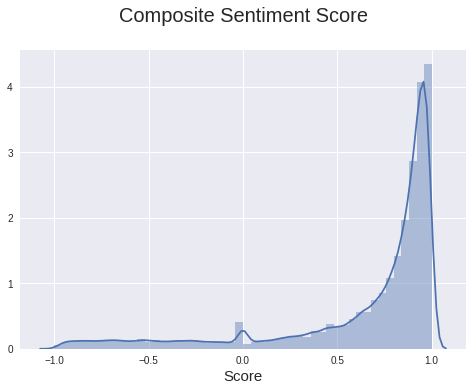

In [29]:
g=sns.distplot(raw_data.comp_senti)
g.axes.set_ylim(0,)
g.axes.set_title('Composite Sentiment Score\n',fontsize=20)
g.set_xlabel('Score',fontsize=15)

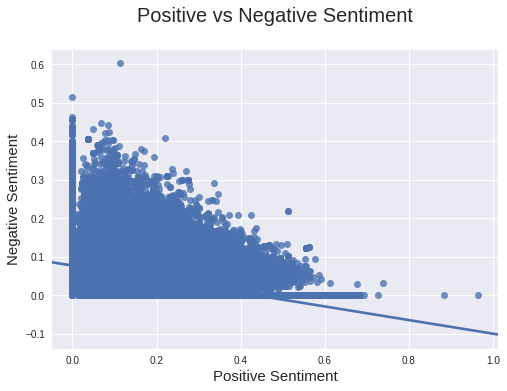

In [30]:
g=sns.regplot(x="pos_senti", y="neg_senti", data=raw_data,
             fit_reg=True)
#g.axes.set_ylim(0,)
#g.axes.set_xlim(0,)
g.axes.set_title('Positive vs Negative Sentiment\n',fontsize=20)
g.set_xlabel('Positive Sentiment',fontsize=15)
g.set_ylabel('Negative Sentiment',fontsize=15)

In [31]:
f='pos_senti ~ neg_senti'
results = smf.ols(formula=f, data=raw_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              pos_senti   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                 2.980e+04
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        18:34:14   Log-Likelihood:             1.7684e+05
No. Observations:              198659   AIC:                        -3.537e+05
Df Residuals:                  198657   BIC:                        -3.537e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2237      0.000    773.013      0.0

I expected a larger R^2

In [32]:
sns.set(context="paper", font="monospace")

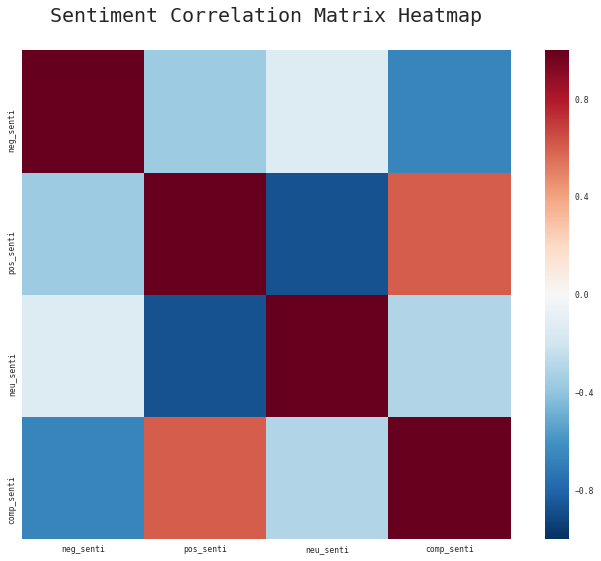

In [33]:
corrmat = raw_data[['neg_senti', 'pos_senti', 'neu_senti', 'comp_senti']].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title('Sentiment Correlation Matrix Heatmap\n',fontsize=20)
plt.savefig('./plots/Sentiment_Correlation_Matrix_Heatmap.png', bbox_inches='tight')

In [34]:
corrmat

,neg_senti,pos_senti,neu_senti,comp_senti
neg_senti,1.000000,-0.361147,-0.136729,-0.660513
pos_senti,-0.361147,1.000000,-0.874365,0.608528
neu_senti,-0.136729,-0.874365,1.000000,-0.302719
comp_senti,-0.660513,0.608528,-0.302719,1.000000


Will use just positive and negative sentiment

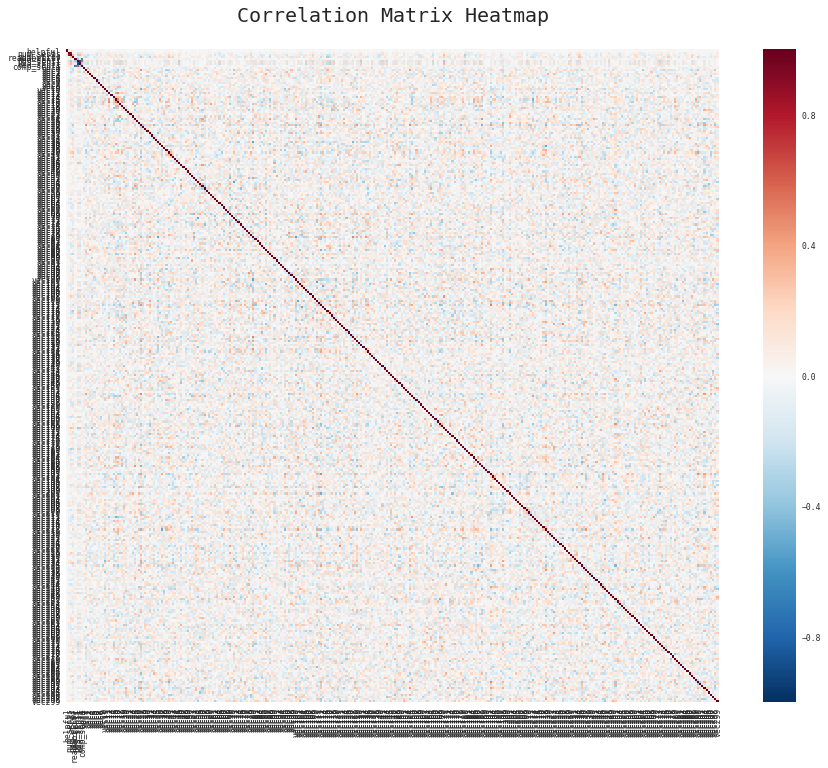

In [35]:
corrmat = raw_data[[s for s in raw_data.columns if s!='text_lemma']].corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=1, square=True)
ax.set_title('Correlation Matrix Heatmap\n',fontsize=20)
plt.savefig('./plots/Correlation_Matrix_Heatmap.png', bbox_inches='tight')

In [36]:
corrmat

,helpful,num_sents,num_words,readability,neg_senti,pos_senti,neu_senti,comp_senti,vec0,vec1,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
helpful,1.000000,0.102511,0.116935,0.045834,0.012478,-0.047061,0.043529,0.014837,-0.002620,-0.021363,...,-0.007855,0.023499,0.004513,0.017345,0.015458,0.009589,-0.017930,0.010046,0.007477,0.009594
num_sents,0.102511,1.000000,0.863832,-0.021251,0.076018,-0.213048,0.186749,0.133111,-0.032275,0.010956,...,0.034047,0.010533,0.007105,0.051453,0.008643,0.036877,-0.055948,0.011442,-0.013039,0.088897
num_words,0.116935,0.863832,1.000000,0.313262,0.073308,-0.339867,0.322886,0.121930,-0.148223,-0.100379,...,-0.061181,0.065817,-0.000758,0.025169,0.046632,-0.025870,-0.114895,0.038241,0.034103,0.068371
readability,0.045834,-0.021251,0.313262,1.000000,0.022891,-0.157609,0.155496,0.006546,-0.148279,-0.254726,...,-0.228822,0.117067,-0.084592,-0.120009,-0.046518,-0.064255,-0.148403,0.069398,0.174569,0.091961
neg_senti,0.012478,0.076018,0.073308,0.022891,1.000000,-0.361147,-0.136729,-0.660513,0.000269,0.027285,...,0.067307,-0.022293,0.035980,0.024012,0.034592,0.008827,0.036765,-0.050581,-0.049765,0.003707
pos_senti,-0.047061,-0.213048,-0.339867,-0.157609,-0.361147,1.000000,-0.874365,0.608528,0.145105,0.133975,...,-0.022096,-0.016266,-0.024395,-0.136705,-0.011772,-0.085221,-0.039653,0.028083,-0.052132,-0.002247
neu_senti,0.043529,0.186749,0.322886,0.155496,-0.136729,-0.874365,1.000000,-0.302719,-0.154296,-0.156506,...,-0.011511,0.028863,0.007205,0.132750,-0.005495,0.085927,0.023007,-0.003486,0.081269,0.000445
comp_senti,0.014837,0.133111,0.121930,0.006546,-0.660513,0.608528,-0.302719,1.000000,0.023960,0.013402,...,-0.066602,0.027652,-0.030618,-0.105427,-0.005562,-0.071606,-0.094764,0.039453,0.017002,0.006873
vec0,-0.002620,-0.032275,-0.148223,-0.148279,0.000269,0.145105,-0.154296,0.023960,1.000000,0.027204,...,-0.112063,0.122762,0.064880,-0.140382,-0.087957,0.069156,-0.014121,0.071805,-0.058156,0.091044
vec1,-0.021363,0.010956,-0.100379,-0.254726,0.027285,0.133975,-0.156506,0.013402,0.027204,1.000000,...,0.327411,-0.087932,-0.032419,0.189473,0.058434,-0.070138,0.153835,0.107056,-0.285649,-0.001794


In [37]:
raw_data=raw_data[fin_cols].copy()

In [38]:
raw_data.head()

,helpful,num_sents,num_words,readability,neg_senti,pos_senti,neu_senti,comp_senti,text_lemma,vec0,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,0.0,0.693147,3.610918,6.742881,0.079,0.068,0.853,-0.1027,product arrive label peanut actually small siz...,0.033346,...,-0.023125,-0.005069,0.007344,-0.045929,-0.017832,-0.018206,-0.017281,0.012410,0.020198,-0.002511
1,0.0,1.386294,3.555348,6.734948,0.000,0.448,0.552,0.9468,great taffy great price wide assortment yummy ...,0.037825,...,-0.015524,0.009058,0.020853,-0.058746,-0.001076,-0.013715,-0.035464,0.006317,0.023066,0.012566
2,0.0,1.609438,4.499810,6.743588,0.029,0.163,0.809,0.8830,get wild hair taffy order pound bag taffy enjo...,0.039023,...,-0.011637,0.008717,0.007918,-0.046595,-0.012542,-0.028316,-0.036677,0.015261,0.016227,0.008930
3,0.0,1.609438,4.143135,6.742527,0.034,0.273,0.693,0.9346,saltwater taffy great flavor soft chewy candy ...,0.038912,...,-0.010440,0.006156,0.007695,-0.039642,-0.012080,-0.026868,-0.018743,0.009134,0.021543,0.016047
4,0.0,1.609438,3.526361,6.737915,0.000,0.480,0.520,0.9487,taffy good soft chewy flavor amazing definitel...,0.043776,...,-0.010004,-0.003239,0.014308,-0.050601,-0.024100,-0.023046,-0.017151,0.017009,0.010729,0.004194


In [39]:
raw_data.to_pickle('./clean_data/clean_data.pkl')